In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../')  
from variability.lightcurve import LightCurve, FoldedLightCurve
from variability.indexes import VariabilityIndex

# `lightcurve` module for loading light-curves

In [2]:
N = 100
time = np.linspace(0, 80, N)
err =  0.0*np.random.random_sample(N)
period = 10. 
amplitude = 1.
noise =  0. #np.random.normal(scale=0.05, size=N)
mag_sin = 0.5*amplitude*np.sin(2*np.pi*time/period) + noise

In [3]:
lc = LightCurve(time, mag_sin, err)

In [4]:
lc_p = FoldedLightCurve(lc=lc, timescale=period)

Text(0, 0.5, 'magnitude')

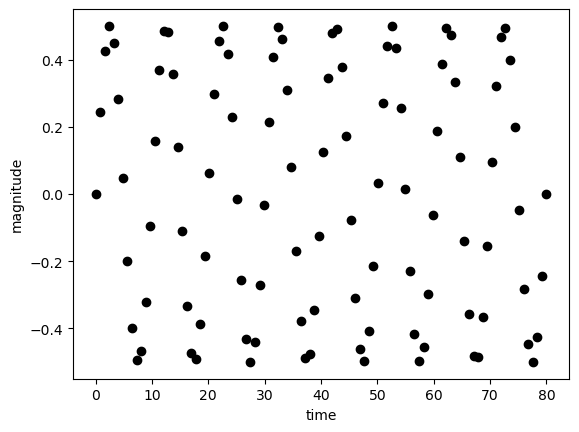

In [5]:
plt.errorbar(lc.time, 
             lc.mag, 
             lc.err, color='k', fmt='o', capsize=2)
plt.xlabel('time')
plt.ylabel('magnitude')

Text(0, 0.5, 'magnitude')

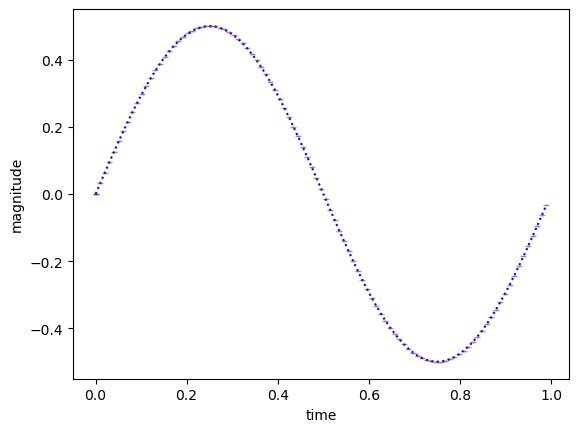

In [6]:
plt.errorbar(lc_p.phase, lc_p.mag_phased, lc_p.err_phased, fmt='o', color='red', ecolor='k', capsize=2, alpha=0.2, ms=1)
plt.plot(lc_p.phase, lc_p.waveform, 'b:')
plt.xlabel('time')
plt.ylabel('magnitude')

# `indexes` module for calculating Q & M

In [7]:
var = VariabilityIndex(lc_p)

If there is no noise and the uncertainties are zero as in the example above, then both Q and M should be very close to 0. 

In [8]:
print(var.Q_index.value, var.M_index.value)
Q_ref = var.Q_index.value
M_ref = var.M_index.value

1.820368224758704e-06 1.4635198358404185e-15


In this example of a sinuosidal light-curve, if one change the timescale to a wrong timescale, then Q_index should assume larger values.

In [9]:
lc_p.timescale = 3.14
lc_p.timescale

3.14

In [10]:
var_ = VariabilityIndex(lc_p)

Text(0.5, 1.0, 'Folded to wrong period')

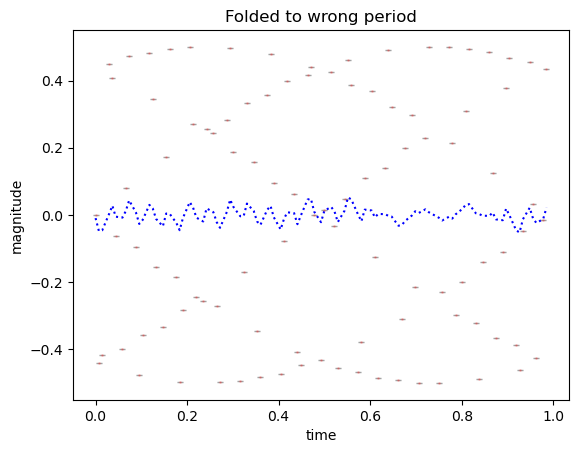

In [11]:
plt.errorbar(lc_p.phase, lc_p.mag_phased, lc_p.err_phased, fmt='o', color='red', ecolor='k', capsize=2, alpha=0.2, ms=1)
plt.plot(lc_p.phase, lc_p.waveform, 'b:')
plt.xlabel('time')
plt.ylabel('magnitude')
plt.title('Folded to wrong period')

In [12]:
var_.Q_index.value

0.9077099815154741

In [13]:
assert var_.Q_index.value != Q_ref

Similarly, if we change the M-index parameter `percentile`, the M-index values should also change

In [14]:
var.M_index.percentile = 20
print(var.M_index.percentile)

20


In [15]:
assert M_ref != var.M_index.value